<a href="https://www.kaggle.com/code/fakhrizalahadiat/eda-telco-customer-churn?scriptVersionId=146196074" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

#Dataset Information

In [4]:
df.shape

(7043, 21)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There is one column whose data type should be float, which is TotalCharges column, so it must be changed first.

#Missing Value Check

In [7]:
#Check TotalCharges Column that contain strings
df.loc[df["TotalCharges"].str.contains(" ")]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


There are 11 `TotalCharges` data that contain strings so they will not be included for analysis.

In [8]:
#Get TotalCharges data that does not contain strings
df = df.loc[~df["TotalCharges"].str.contains(" ")]
#change data type TotalCharges Column to float
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

The TotalCharges column has changed its data type to float and the total data has become 7032

In [10]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

there are no missing values in the data

# Duplicated Check

In [11]:
df.duplicated().sum()

0

there are no duplicate data

### Observation

In the`TotalCharges` column, previously the object data type was converted to float, there was an error because it contained a string. After checking, it turns out that there is data that contains`whitespace` strings so that only data that does not contain strings is taken so that the amount of data becomes 7032, after which the conversion is made to the float data type.

# Data Understanding

## Statistical Summary

In [12]:
#separate categorical and numerical column
categorical = ["customerID","gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod","Churn"]
numerical = ["SeniorCitizen","tenure","MonthlyCharges","TotalCharges"]

In [13]:
#numerical statistical summary
df[numerical].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


It can be seen that there are discrete and continous data types in numerical data

1.   Discrete : SeniorCitizen
2.   Continous : tenure, MonthlyCharges, TotalCharges



In [14]:
#see value from discrete data
df["SeniorCitizen"].value_counts()

SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

**Observation:**
1. For each of the min and max value columns there is no issue
2. `SeniorCitizen` is a boolean data type because there are only 2 unique values 0 or 1.
3. `tenure` Mean is greater than the median so the distribution tends to be positively skew
4. `MonthlyCharges` Mean is smaller than the median so the distribution tends to negative skew
5. `TotalCharges` Mean is greater than the median so the distribution tends to positive skew

In [15]:
#categorical statistical summary
df[categorical].describe().T

,count,unique,top,freq
customerID,7032,7032,7590-VHVEG,1
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


In [16]:
#see value from categorical data
for col in categorical:
  print(f"Value pada {col} adalah")
  print(df[col].value_counts(), "\n")

Value pada customerID adalah
customerID
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: count, Length: 7032, dtype: int64 

Value pada gender adalah
gender
Male      3549
Female    3483
Name: count, dtype: int64 

Value pada Partner adalah
Partner
No     3639
Yes    3393
Name: count, dtype: int64 

Value pada Dependents adalah
Dependents
No     4933
Yes    2099
Name: count, dtype: int64 

Value pada PhoneService adalah
PhoneService
Yes    6352
No      680
Name: count, dtype: int64 

Value pada MultipleLines adalah
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64 

Value pada InternetService adalah
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64 

Value pada OnlineSecurity adalah
OnlineSecurity
No                     3497
Yes            

**Observation**
1. `gender` has 2 unique values which are Male, Female
2. `Partner, Dependents, PhoneService, PaperlessBilling , Churn` are boolean data types because they only have 2 unique values, which is Yes or No.
3. `MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, Techsupport, StreamingTV, StreamingMovies, Contract` only have 3 unique data types.
4. `PaymentMethod` has 4 unique values
5. It can be seen that the most customers are male gender and do not have partners and dependents and the majority of customers have phone service with the most internet using FiberOptic.
6. The majority of customers do not have multipleline, online security, online backup, device protection, tech support, streaming TV and streaming Movies.
7. The majority of payment contracts are Month to Month, billing is paperless and the payment method is Electronic Check

# Univariate Analysis

### Boxplot to see outliers

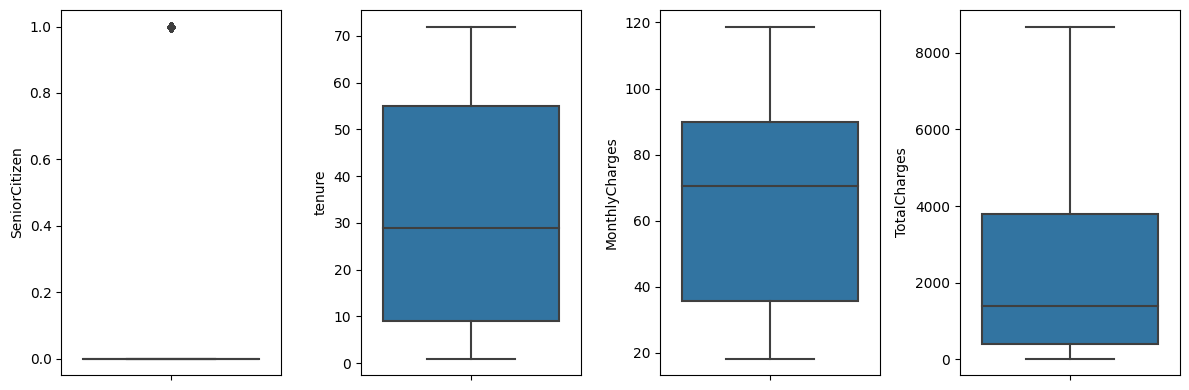

In [17]:
plt.figure(figsize = (12,4))

features = numerical
for i in range(0,len(features)):
  plt.subplot(1,len(features), i+1)
  sns.boxplot(data = df, y = features[i])
  plt.tight_layout()

In [18]:
#cek outlier secara mendetail
outlier = df["SeniorCitizen"].max()

df[df["SeniorCitizen"] == outlier]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
50,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.10,No
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


**Observation**

There are 1142 outliers in `SeniorCitizen` column with value = 1 but this is not a concern because the data type of the `SeniorCitizen` column is boolean and there are only 2 values, 1 or 0.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

### Countplot Churn (Target)

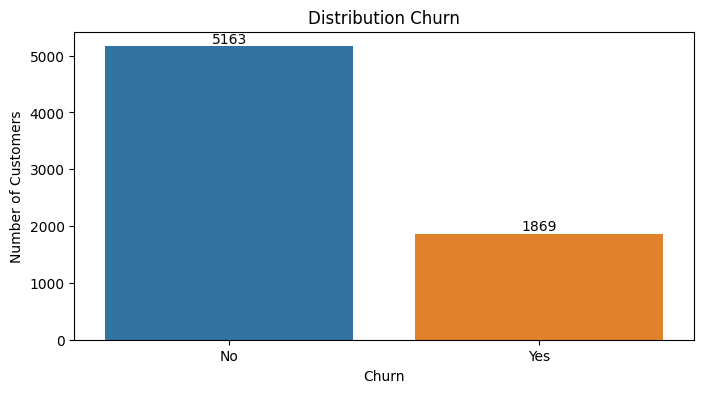

In [20]:
plt.figure(figsize = (8,4))
ax = sns.countplot(x = df["Churn"])
ax.bar_label(ax.containers[0], color = "black")
plt.title("Distribution Churn")
plt.ylabel("Number of Customers")
plt.show()

**Observation**

In the `Churn` column barplot, there is an imbalance in the distribution between those whose churn is Yes or No, so further analysis is needed.

### Countplot based on customer Demographics

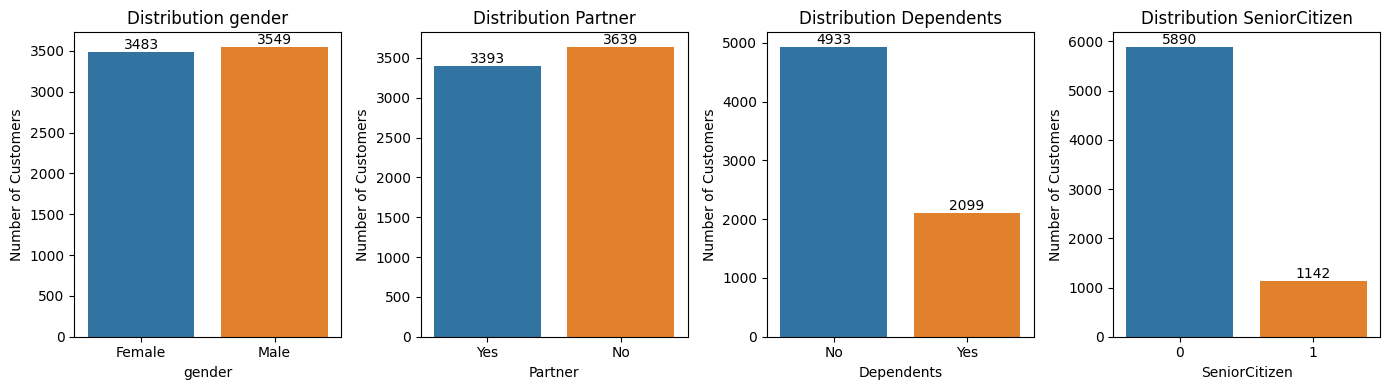

In [21]:
features = ["gender","Partner","Dependents","SeniorCitizen"]
plt.figure(figsize = (14,4))
for i in range(0,len(features)):
  plt.subplot(1, len(features), i+1)
  ax = sns.countplot(x=df[features[i]])
  ax.bar_label(ax.containers[0], color = "Black")
  plt.title("Distribution " + features[i])
  plt.ylabel("Number of Customers")
  plt.tight_layout()

**Observation**

1. t can be seen that customers based on `gender` and `partner` tend to be balanced
2. There is a significant difference in the`SeniorCitizen` that for customers with Senior Citizen criteria only 16.24% while 83.75% of customers are young
2. It can be seen in the `Dependents` column that as many as 70% of the majority of customers do not have dependents, this is in accordance with the `SeniorCitizen` column because the majority of customers are young.

### Countplot based on service type

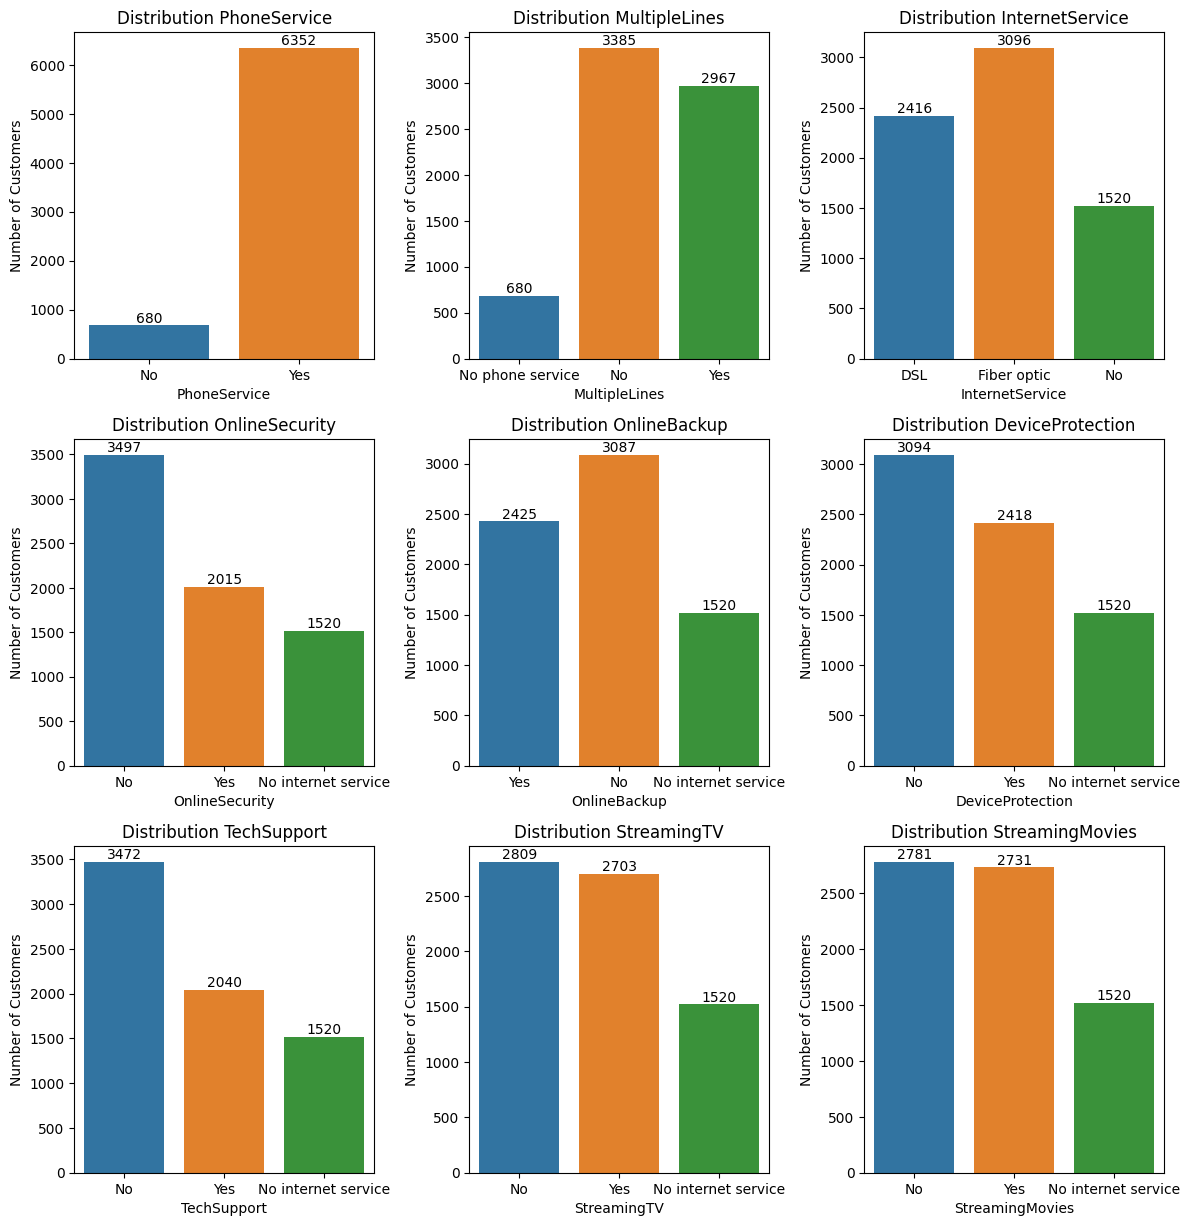

In [22]:
features = ["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
plt.figure(figsize = (12,16))
for i in range(0,len(features)):
  plt.subplot(4, len(features)//3, i+1)
  ax = sns.countplot(x=df[features[i]])
  ax.bar_label(ax.containers[0], color = "Black")
  plt.title("Distribution " + features[i])
  plt.ylabel("Number of Customers")
  plt.tight_layout()

**Observation**
1. It can be seen that customers tend to have PhoneService and the majority do not have Multiplelines.
2. For internet services, the majority of customers tend to use Fiber Optic
3. For the OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport columns, each distribution is unbalanced and the majority of customers do not have these services.
4. For the StreamingTV and Streaming Movies columns, the distribution tends to be balanced for those who have and do not have these services, while the imbalance occurs for customers who do not have internet service.

### Countplot based on payment type

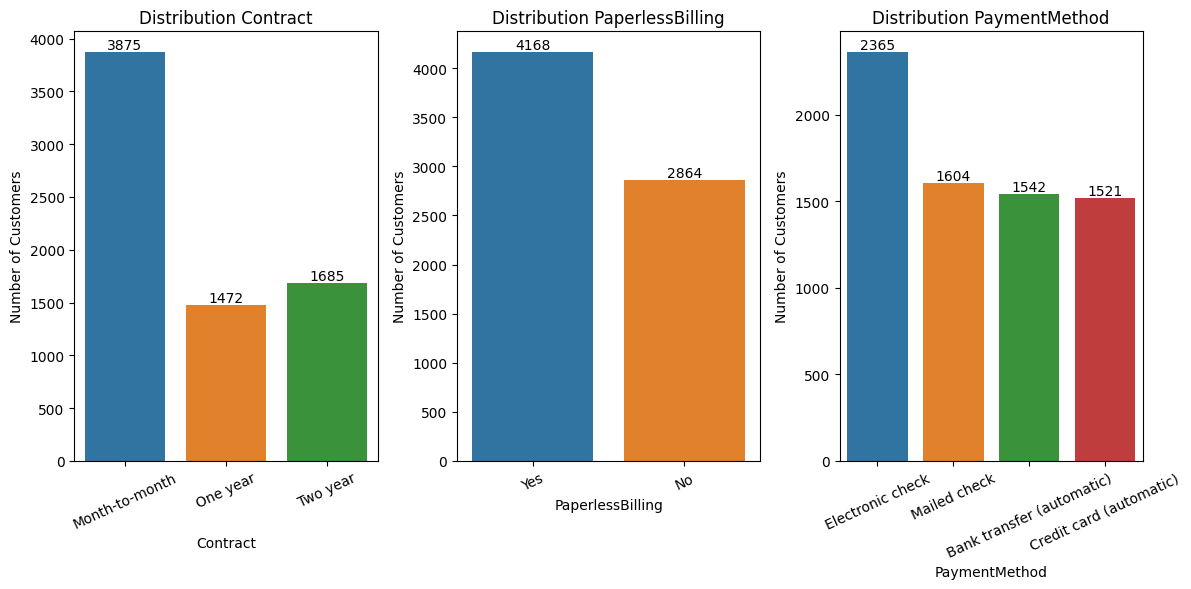

In [23]:
features = ["Contract","PaperlessBilling","PaymentMethod",]
plt.figure(figsize = (12,6))
for i in range(0,len(features)):
  plt.subplot(1, len(features), i+1)
  ax = sns.countplot(x=df[features[i]])
  ax.bar_label(ax.containers[0], color = "Black")
  plt.title("Distribution " + features[i])
  plt.ylabel("Number of Customers")
  plt.xticks(rotation = 25)
  plt.tight_layout()

**Observation**
1. The distribution of payment contracts is not balanced and the majority of customers tend to make payments made monthly.
2. The majority of customers tend to use paperless bills
3. In PaymentMethod, it can be seen that the majority of customers make payments using Electronic payment methods while other payment methods tend to be the same

### Histogram and KDE Plot to determine the distribution of numerical data

In [24]:
features = numerical

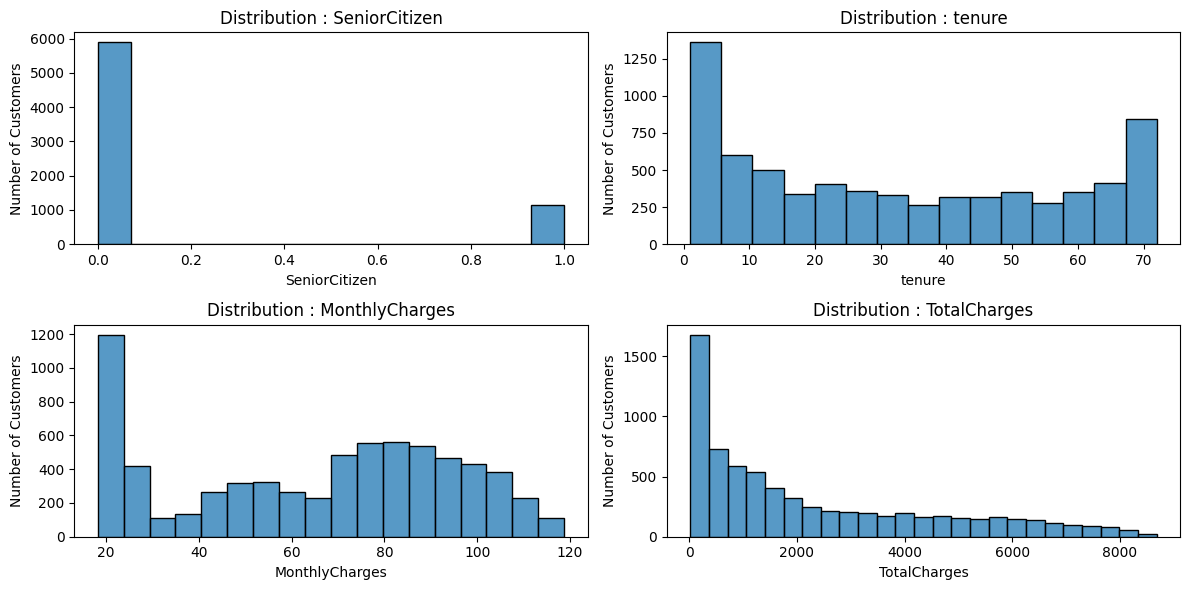

In [25]:
#create histogram to see distribution numerical data
plt.figure(figsize = (12,6))
for i in range(0,len(features)):
  plt.subplot(2, len(features)//2, i+1)
  sns.histplot(x=df[features[i]])
  plt.title("Distribution : " + features[i])
  plt.ylabel("Number of Customers")
  plt.tight_layout()

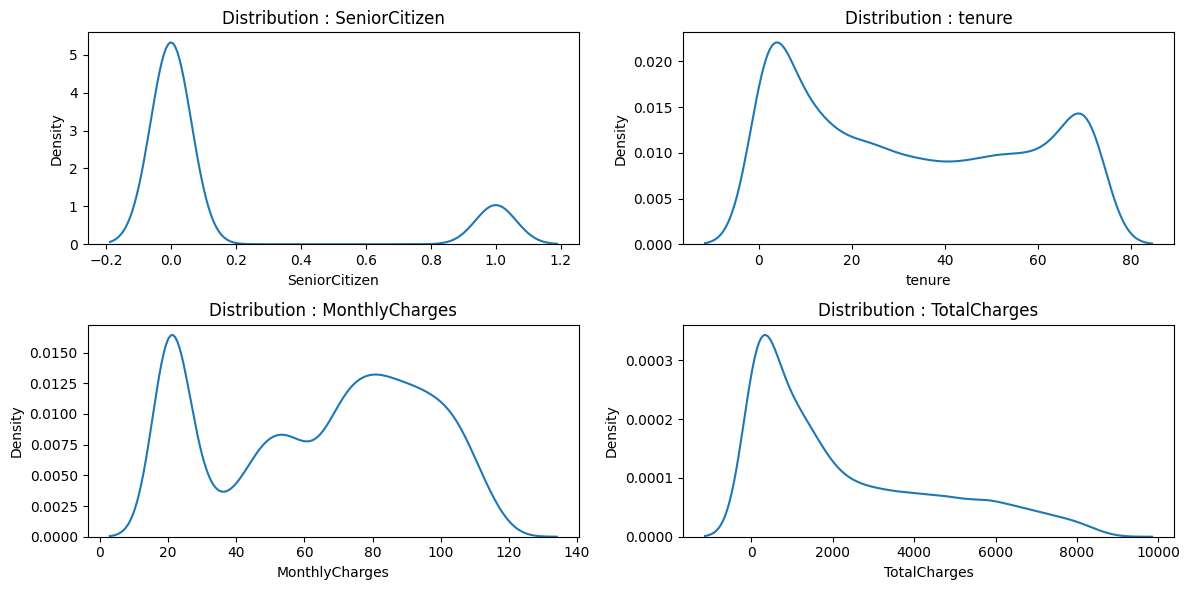

In [26]:
#create KDE Plot to see distribution numerical data
plt.figure(figsize = (12,6))
for i in range(0,len(features)):
  plt.subplot(2, len(features)//2, i+1)
  sns.kdeplot(x=df[features[i]])
  plt.title("Distribution : " + features[i])
  plt.tight_layout()

**Observation**
1. For the `SeniorCitizen` column, which is discrete data and only has 2 unique values, it can be seen that the distribution is mostly at 0 and the distribution is not balanced, which means that the majority of customers are young.
2. For the `tenure` column, it can be seen that the frequency of distribution is mostly around the number 1 - 5 and the distribution is not normal and the distribution is bimodal.
3. For the `MonthlyCharges`  column, the frequency of distribution is mostly around 20 and the distribution is not normal
4. For the `TotalCharges` column, the frequency of distribution is mostly between 0 - 200 and the distribution is not normal / symmetrical tends to skew to the right.

# Bivariate Analysis

### Churn Barplot based on Customer Demographics

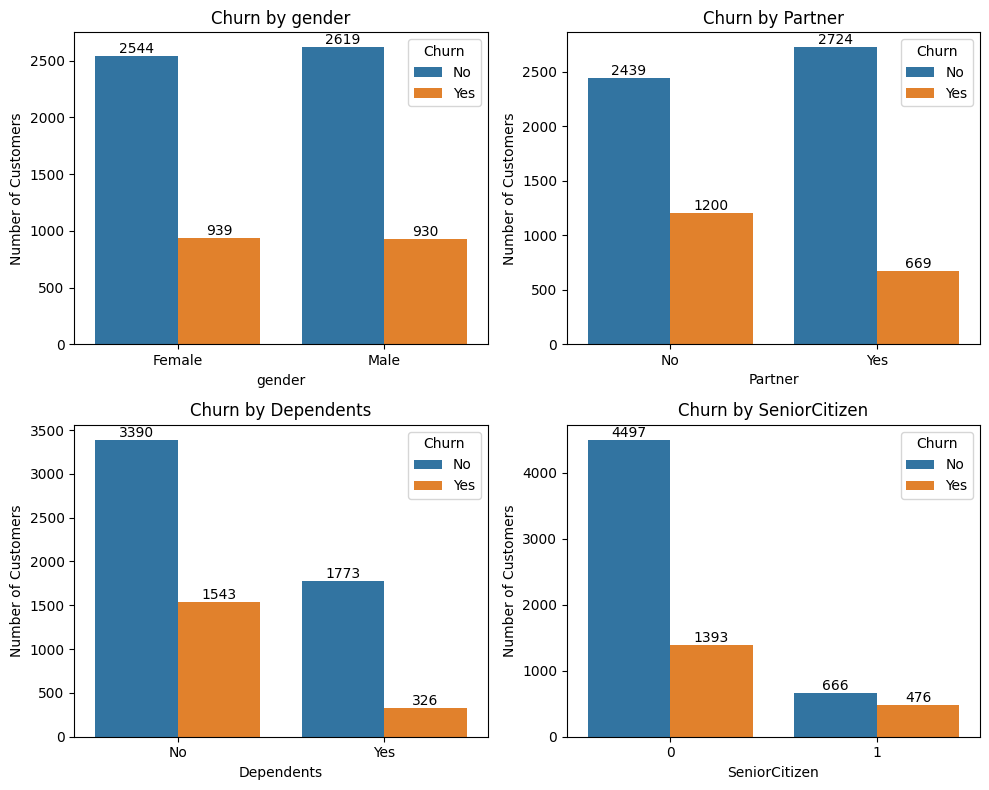

In [27]:
features = ["gender","Partner","Dependents","SeniorCitizen"]
plt.figure(figsize = (10,8))
for i in range(0,len(features)):
  churn_demografi = df.groupby(features[i],as_index = False)["Churn"].value_counts()
  plt.subplot(2, len(features)//2, i+1)
  ax = sns.barplot(x=features[i], y = "count", hue="Churn", data = churn_demografi)
  ax.bar_label(ax.containers[0], color = "Black")
  ax.bar_label(ax.containers[1], color = "Black")
  plt.title("Churn by " + features[i])
  plt.ylabel("Number of Customers")
  plt.tight_layout()

**Observation**

1. It can be seen that churn does not affect gender because the numbers tend to be the same.
2. It can be seen that churn is more in customers who do not have a partner
3. It can be seen that churn is more in customers who do not have dependents
4. It can be seen that churn is more in young customers, but the percentage of churn is higher in senior customers than young customers, which is 41.68%.

### Churn Barplot based on Service Type

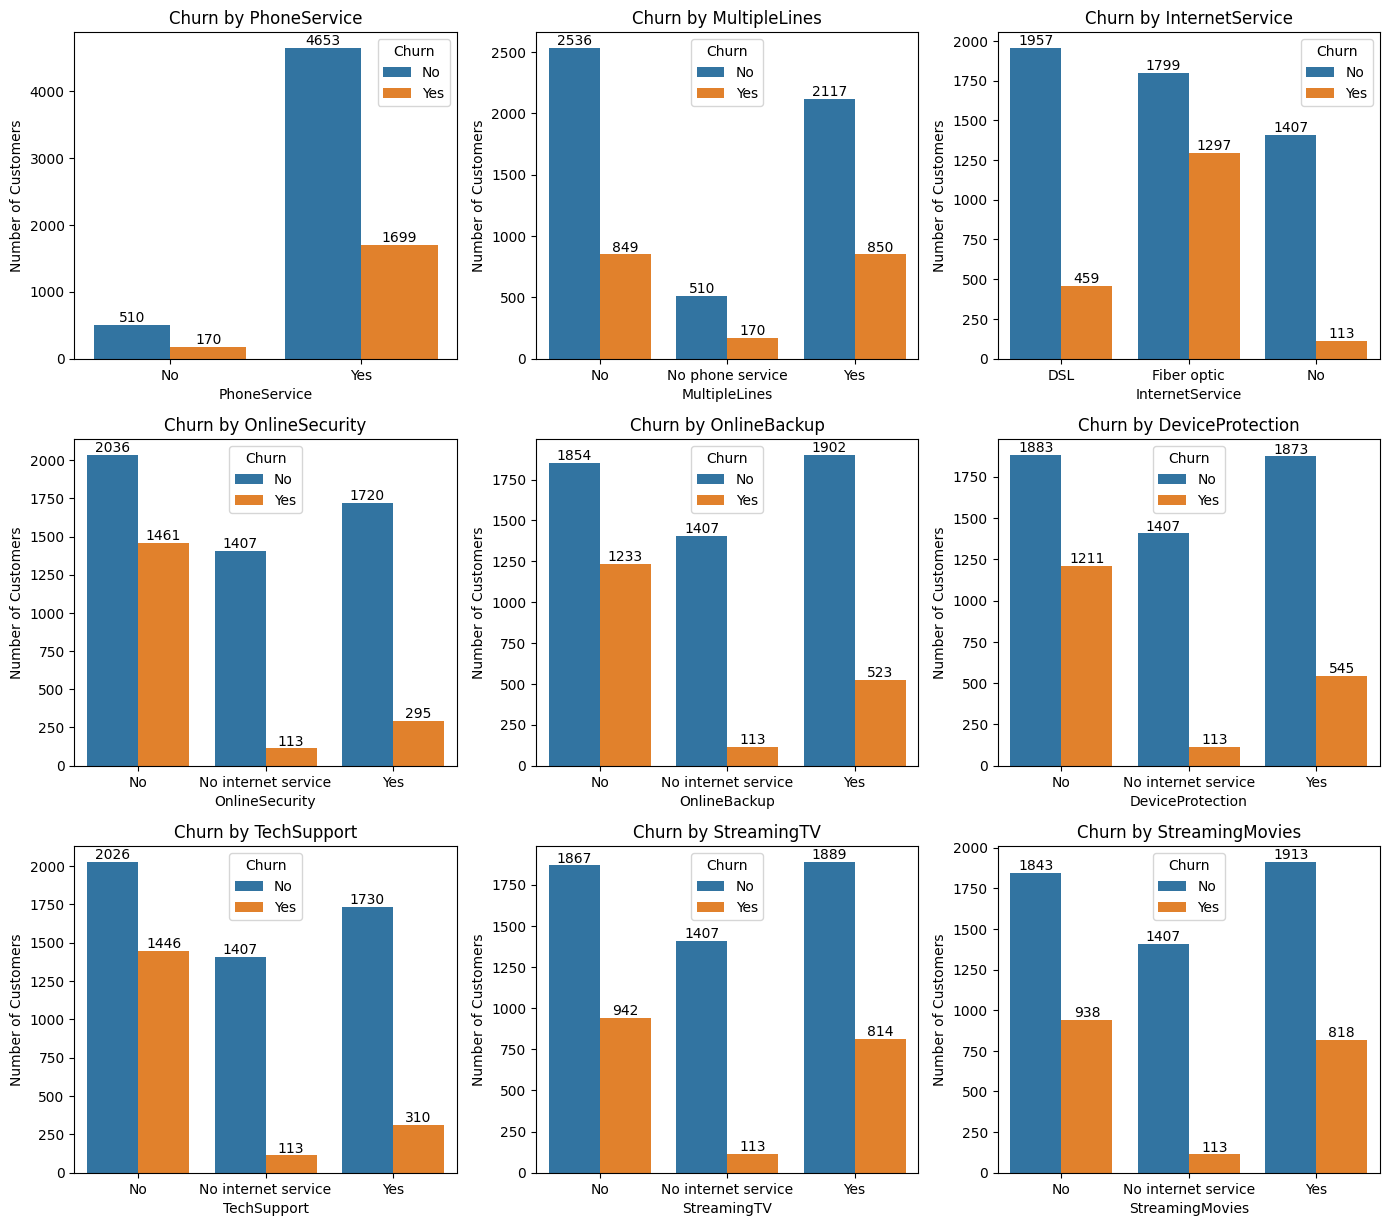

In [28]:
features = ["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
plt.figure(figsize = (14,16))
for i in range(0,len(features)):
  churn_service = df.groupby(features[i],as_index = False)["Churn"].value_counts()
  plt.subplot(4, len(features)//3, i+1)
  ax = sns.barplot(x=features[i], y = "count", hue="Churn", data = churn_service)
  ax.bar_label(ax.containers[0], color = "Black")
  ax.bar_label(ax.containers[1], color = "Black")
  plt.title("Churn by " + features[i])
  plt.ylabel("Number of Customers")
  plt.tight_layout()

**Observation**
1. The phoneservice column is not needed here because it has been covered by the multiplelines column.
2. For churn on multiplelines, it tends to be the same for customers who have multiplelines or not.
3. For churn on internet service, it is dominated by customers who use Fiber Optic internet compared to other types of internet.
4. It can be seen that customer churn tends to be more for customers who do not have / are provided with Online Security, OnlineBackup, Device Protection and Tech Support services.
5. Meanwhile, customer churn based on streamingTV and streamingMovies services tends to be almost the same so customer churn is most likely not based on these services.

### Churn Barplot based on Payment Type

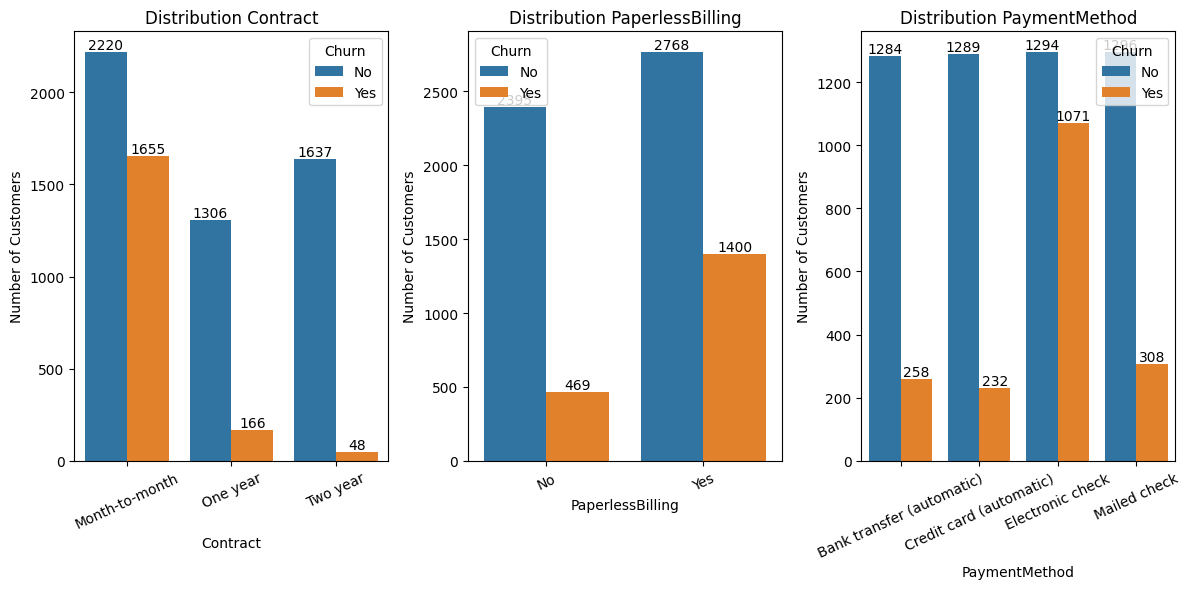

In [29]:
features = ["Contract","PaperlessBilling","PaymentMethod",]
plt.figure(figsize = (12,6))
for i in range(0,len(features)):
  churn_jenispembayaran = df.groupby(features[i],as_index = False)["Churn"].value_counts()
  plt.subplot(1, len(features), i+1)
  ax = sns.barplot(x=features[i], y = "count", hue="Churn", data = churn_jenispembayaran)
  ax.bar_label(ax.containers[0], color = "Black")
  ax.bar_label(ax.containers[1], color = "Black")
  plt.title("Distribution " + features[i])
  plt.ylabel("Number of Customers")
  plt.xticks(rotation = 25)
  plt.tight_layout()

**Observation**
1. It can be seen that customer churn is dominant in payments made every month compared to other payments.
2. Customers tend to churn to customers who usually make payments through electronic payments with paperless bills

# Multivariate Analysis

### Heatmap to see Correlation between Numerical columns

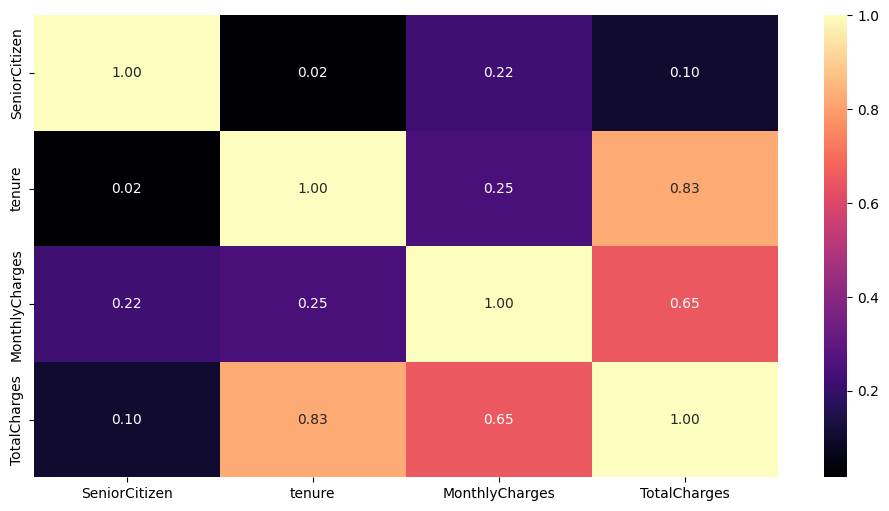

In [30]:
plt.figure(figsize = (12,6))
corr = df[numerical].corr()
sns.heatmap(corr, annot=True, fmt =".2f", cmap="magma")
plt.show()

**Observation**

It can be seen that there is a strong relationship between tenure and TotalCharges and MonthlyCharges and TotalCharges.

### Scatterplot untuk melihat sebaran customer yang Churn

Scatterplot Churn by Tenure vs TotalCharges

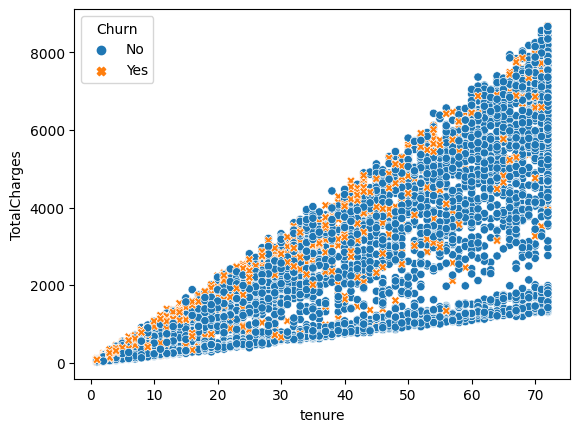

In [31]:
sns.scatterplot(data = df, x = "tenure", y="TotalCharges", hue ="Churn", style="Churn")
plt.show()

**Observation**

It can be seen that longer tenure with higher total charges has higher churn potential.

Scatterplot Churn by Tenure vs MonthlyCharges

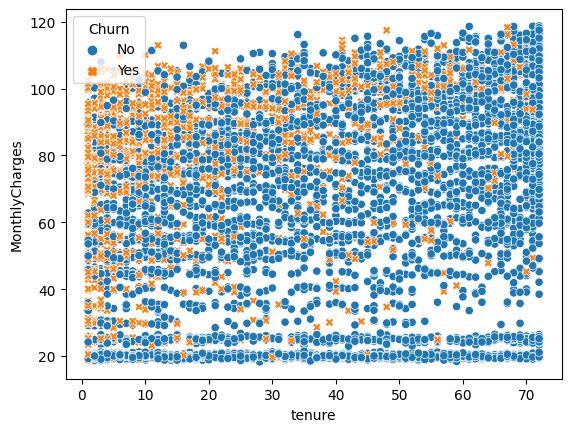

In [32]:
sns.scatterplot(data = df, x = "tenure", y="MonthlyCharges", hue ="Churn", style="Churn")
plt.show()

**Observation**

It can be seen that Churn occurs mostly in tenure 0 - 20 months with large MonthlyCharges.

Scatterplot Churn by MonthlyCharges vs TotalCharges

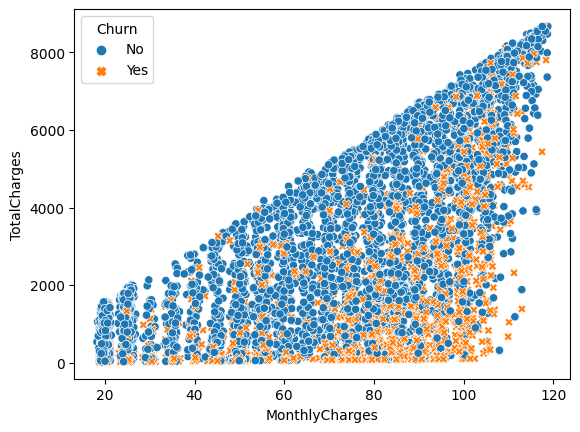

In [33]:
sns.scatterplot(data = df, x = "MonthlyCharges", y="TotalCharges", hue ="Churn", style="Churn")
plt.show()

**Observation**

It can be seen that there is a strong relationship where the higher the Monthlycharges the higher the TotalCharges, here it can also be seen that there is more Churn in higher MonthlyCharges with lower TotalCharges.

### Pairplot to view detailed customer churn on numeric type data

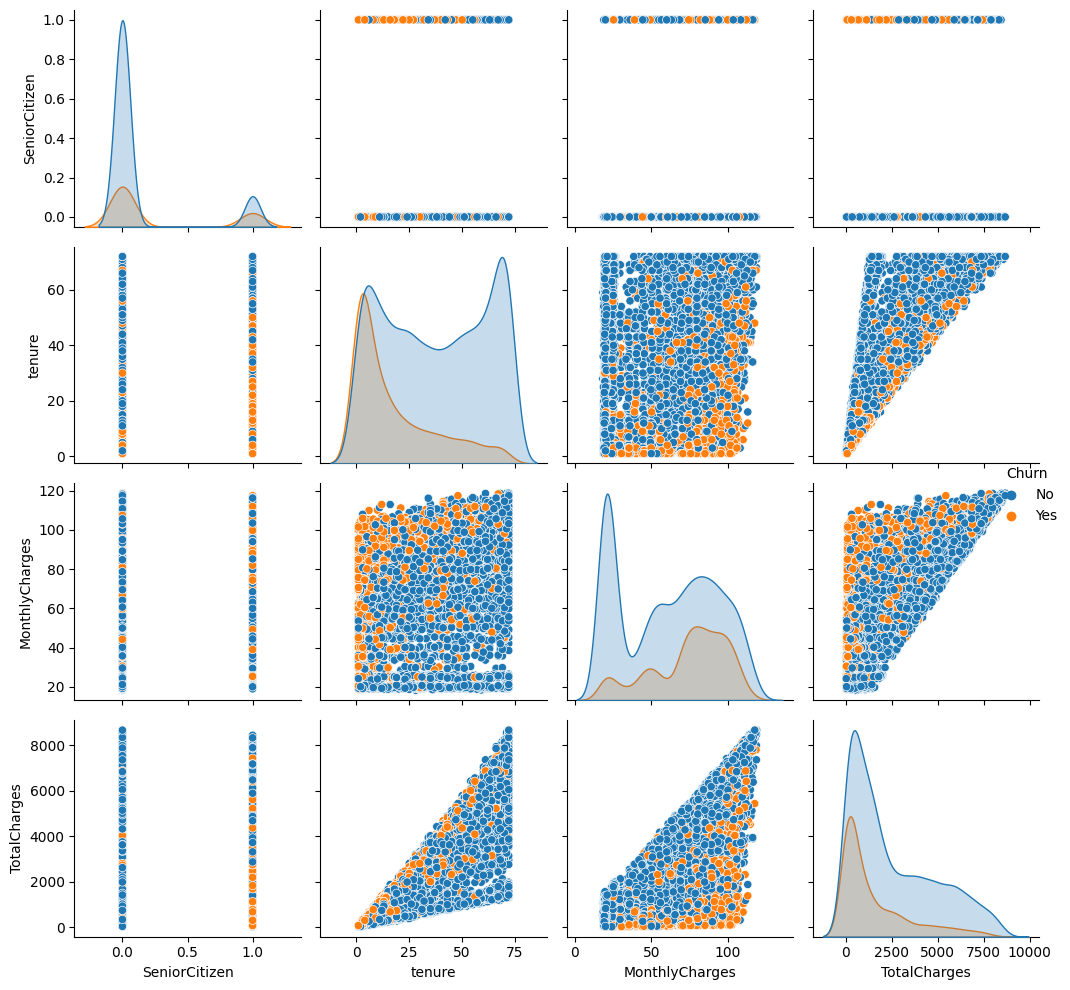

In [34]:
sns.pairplot(df, hue="Churn")
plt.tight_layout()
plt.show()

**Observation**

It can be seen that Churn occurs on tenure 0 - 20 months with high Monthly Charges on that tenure and it can also be seen that the number of churns is highest in young customers but when viewed based on the percentage of Churn, churn occurs more in senior customers than young customers.

# Deep Dive Exploration

### What is the average MonthlyCharges and TotalCharges for customers who experience churn?

In [35]:
condition = df["Churn"] == "Yes"
customer_churn = df[condition].groupby(["SeniorCitizen"]).agg(mean_monthlycharges = ("MonthlyCharges", "mean"),
                                                    mean_totalcharges = ("TotalCharges","mean")).reset_index()
customer_churn

,SeniorCitizen,mean_monthlycharges,mean_totalcharges
0,0,72.298098,1421.767229
1,1,80.713445,1853.792332


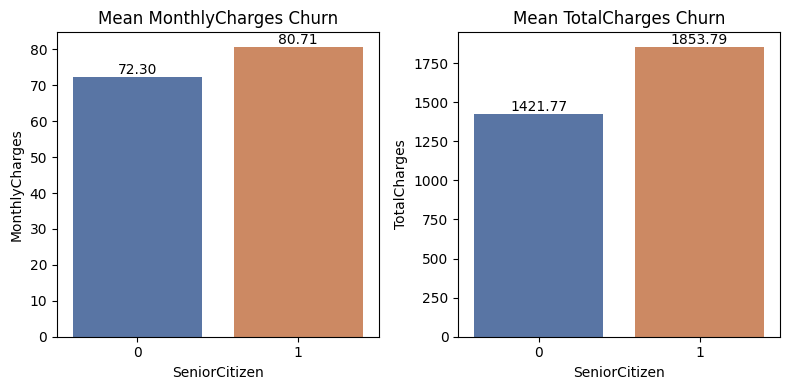

In [36]:
plt.figure(figsize = (8,4))

#Average monthlycharges churn barplot
plt.subplot(1,2,1)
ax = sns.barplot(data = customer_churn, x = "SeniorCitizen", y="mean_monthlycharges", palette="deep")
ax.bar_label(ax.containers[0], color ="Black", fmt = "%.2f")
ax.set_title("Mean MonthlyCharges Churn")
ax.set_ylabel("MonthlyCharges")

#Average totalcharges churn barplot 
plt.subplot(1,2,2)
ax = sns.barplot(data = customer_churn, x = "SeniorCitizen", y="mean_totalcharges", palette="deep")
ax.bar_label(ax.containers[0], color ="Black", fmt = "%.2f")
ax.set_title("Mean TotalCharges Churn")
ax.set_ylabel("TotalCharges")
plt.tight_layout()
plt.show()

**Observation**

That there is a difference in churn where senior customers churn with higher average MonthlyCharges and TotalCharges compared to young customers. It can be concluded that senior customers churn because of the larger bills.

### What is the average customer churn based on internet services?



In [37]:
#Create new feature (Feature Engineering)
df['TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)

In [38]:
condition = df["Churn"] == "Yes"
services_churn = df[condition].groupby(["SeniorCitizen","TotalServices"]).agg(count_totalservices = ("TotalServices","count")).reset_index()
services_churn

,SeniorCitizen,TotalServices,count_totalservices
0,0,0,23
1,0,1,389
2,0,2,320
3,0,3,258
4,0,4,209
5,0,5,130
6,0,6,51
7,0,7,13
8,1,0,12
9,1,1,99


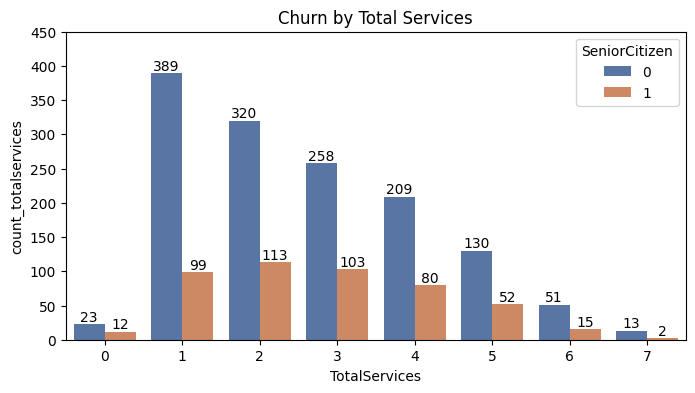

In [39]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data = services_churn, x = "TotalServices", y ="count_totalservices", hue="SeniorCitizen", palette="deep")
ax.bar_label(ax.containers[0], color="Black")
ax.bar_label(ax.containers[1], color="Black")
ax.set_title("Churn by Total Services")
ax.set_ylim(ymax = 450)
plt.show()

**Observation**

It can be seen that churn mostly happened to customers who only have 1 to 3 services, while churn happened a little to customers who have all services.

### Senior Customer Churn based on tenure

In [40]:
condition = (df["Churn"] == "Yes") & (df["SeniorCitizen"] == 1)
tenure_churn = df[condition].groupby(["SeniorCitizen","tenure"]).agg(count = ("tenure","count") ).reset_index().sort_values("count", ascending = False).head(10)
tenure_churn

,SeniorCitizen,tenure,count
0,1,1,74
1,1,2,30
2,1,3,20
4,1,5,15
7,1,8,15
3,1,4,13
14,1,15,12
26,1,27,11
6,1,7,11
15,1,16,11


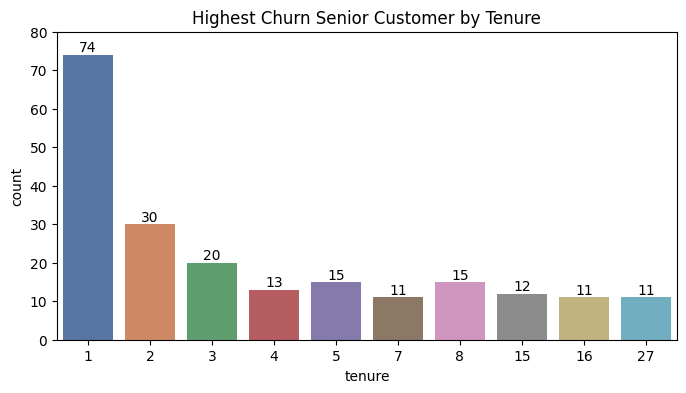

In [41]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data = tenure_churn, x = "tenure", y ="count", palette="deep")
ax.bar_label(ax.containers[0], color="Black")
ax.set_title("Highest Churn Senior Customer by Tenure")
ax.set_ylim(ymax = 80)
plt.show()

**Observation**

The churn that happens to senior customers is more in the 1-month tenure, this is likely due to the large MonthlyCharges and only having limited services.

# EDA Conclusion

1. The dataset in the TotalCharges column, previously the object data type was converted to float, there was an error because it contained a string. After checking it turns out that there is data that contains whitespace strings so that only data that does not contain strings is taken so that the amount of data becomes 7032, after which the conversion is made to the float data type.
2. There is no duplicate data
3. For the SeniorCitizen column is discrete data and only has 2 unique values
4. For the tenure column, it can be seen that the distribution frequency is mostly around the number 1 - 5 and the distribution is not normal and the distribution is bimodal
5. For the MonthlyCharges column, the frequency of distribution is mostly around the number 20 and the distribution is not normal
6. For the TotalCharges column, the frequency of distribution is mostly between 0 - 200 and the distribution is not normal / symmetrical tending to skew to the right
7. It can be seen that there is a fairly strong relationship between tenure and TotalCharges and MonthlyCharges and TotalCharges.
8. It was found that gender and partner do not affect the existence of high churn because it can be seen that the number of churns in gender and partner is almost the same.
9. The majority of customers are young because it can be seen that the majority of customers do not have dependents.
10. Churn is most frequent in young customers but based on percentage, it is senior customers who have the highest percentage of churn.
11. Churn mostly happened in tenure 0 - 20 months due to high Monthly Charges and Total Charges, maybe this factor is one of the causes of churn.
12. Churn also happened to customers who only have 1 - 3 services, this minimal service is the cause of churn and the majority use Fiber Optic internet 12.